# Vamos ver como obter as Bandas de Bollinger e como projetar as mesmas em um gráfico:

### 1- o que são?
Bandas de Bollinger são uma ferramenta da análise técnica que nos permite visualizar possíveis limites de alta e de baixa de uma ação.
### 2- como funcionam?
Bandas de Bollinger consistem numa linha central e duas outras (bandas) de preços acima e abaixo desta. A linha central é uma média móvel; as bandas de preços são os desvios-padrão das ações em análise. As bandas irão se expandir e contrair de acordo com o preço da ação.
### 3- na prática:
O preço da ação normalmente fica variando entre a banda de cima e a banda de baixo.

In [1]:
#Bibliotecas Necessárias:
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas as pd
import numpy as np

In [2]:
#Variáveis base para obter os dados da ação:

#ticker da empresa Magazine Luiza retirado do yahoofinance:
ticker="mglu3.sa"
#se deixar a data inicial em branco ele irá buscar a data mais antiga disponível
data_inicial = "01/01/2020"
#se deixar a data final em branco ele irá buscar a data mais recente disponível
data_final = "01/01/2021"

In [3]:
#Obtendo os dados da ação:
acao = web.DataReader(ticker, 'yahoo', start=data_inicial, end=data_final)

### Como vimos previamente, para calcular as Bandas iremos precisar da média móvel e do desvio padrão, vamos criar uma função para eles:

In [4]:
#função da média móvel:
periodos=20
def Media_Movel(periodos):
    acao['Média Móvel de ' + str(periodos) + 'p'] = acao['Adj Close'].rolling(periodos).mean()

In [5]:
#função do desvio padrão:
def desvio_padrao(periodos):
    acao['Desvio Padrão de ' + str(periodos) + 'p']=acao['Adj Close'].rolling(periodos).std()

In [6]:
#função da banda de bollinger de cima:
def banda_de_cima(periodos):
    acao['Banda de Cima de ' + str(periodos) + 'p']=acao['Média Móvel de ' + str(periodos) + 'p'] + (2*acao['Desvio Padrão de ' + str(periodos) + 'p'])

In [7]:
#função da banda de bollinger de baixo:
def banda_de_baixo(periodos):
    acao['Banda de Baixo de ' + str(periodos) + 'p']=acao['Média Móvel de ' + str(periodos) + 'p'] - (2*acao['Desvio Padrão de ' + str(periodos) + 'p'])

In [8]:
#função das bandas de bollinger:
def bandas_de_bollinger(periodos):
    Media_Movel(periodos)
    desvio_padrao(periodos)
    banda_de_cima(periodos)
    banda_de_baixo(periodos)

bandas_de_bollinger(periodos)

C:\Users\Pessoal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


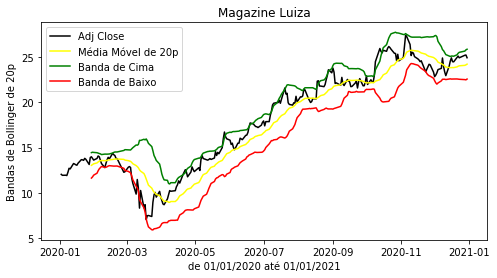

In [9]:
#criando e customizando o gráfico:
plt.figure(figsize=(8,4))
plt.title('Magazine Luiza')
plt.xlabel("de " + data_inicial + " até " + data_final)
plt.ylabel('Bandas de Bollinger de ' + str(periodos) + 'p')
plt.plot(acao['Adj Close'], color='black', label='Adj Close')
plt.plot(acao['Média Móvel de ' + str(periodos) + 'p'], color='yellow', label='Média Móvel de ' + str(periodos) + 'p')
plt.plot(acao['Banda de Cima de ' + str(periodos) + 'p'], color='green', label='Banda de Cima')
plt.plot(acao['Banda de Baixo de ' + str(periodos) + 'p'], color='red', label='Banda de Baixo')
plt.legend()

### Também podemos preencher a área entre as bandas para deixar o gráfico mais didático:

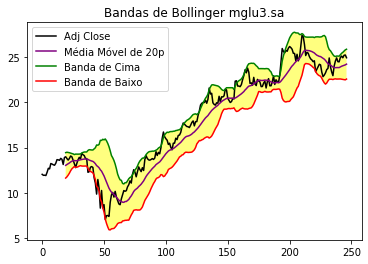

In [20]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(acao['Adj Close'])), acao['Adj Close'], color='black', label='Adj Close')
ax.plot(np.arange(len(acao['Adj Close'])), acao['Média Móvel de ' + str(periodos) + 'p'], color='purple', label='Média Móvel de ' + str(periodos) + 'p')
ax.plot(np.arange(len(acao['Adj Close'])), acao['Banda de Cima de ' + str(periodos) + 'p'], color='green', label='Banda de Cima')
ax.plot(np.arange(len(acao['Adj Close'])), acao['Banda de Baixo de ' + str(periodos) + 'p'], color='red', label='Banda de Baixo')
ax.legend()

ax.fill_between(x=np.arange(len(acao['Adj Close'])), y1=acao['Banda de Cima de ' + str(periodos) + 'p'], y2=acao['Banda de Baixo de ' + str(periodos) + 'p'], facecolor='yellow', alpha=0.5)

ax.set_title('Bandas de Bollinger ' + ticker)
plt.show()